In [1]:
from servicex import ServiceXDataset
from func_adl_servicex import ServiceXSourceXAOD
import matplotlib.pyplot as plt
import awkward as ak

In [2]:
sx_dataset =  ServiceXDataset("mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00", backend_type='dev_xaod')
ds = ServiceXSourceXAOD(sx_dataset)

No 'dev_xaod' backend type found, using http://localhost:5000 - please add to the configuration file (e.g. servicex.yaml)


In [3]:
data = ds \
    .SelectMany('lambda e: (e.Jets("AntiKt4EMTopoJets"))') \
    .Where('lambda j: (j.pt()/1000)>30') \
    .Select('lambda j: j.pt()') \
    .AsROOTTTree("bogus.root", "dev", ["JetPt"]) \
    .value()

mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00:   0%|          | 0/9000000000.0 [00:00]
mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00:   0%|          | 0/9000000000.0 [00:00]
mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00:   0%|          | 0/17 [00:00]
        Downloaded:   0%|          | 0/17 [00:00]          
mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00:   0%|          | 0/17 [00:05]
        Downloaded:   0%|          | 0/17 [00:05]
mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00:   0%|          | 0/17 [00:10]
        Downloaded:   0%|          | 0/17 [00

In [7]:
import uproot
f = uproot.open(data[0])

['dev8;1']


In [8]:
tuple_name = f.keys()[0]
data = f[tuple_name].arrays()

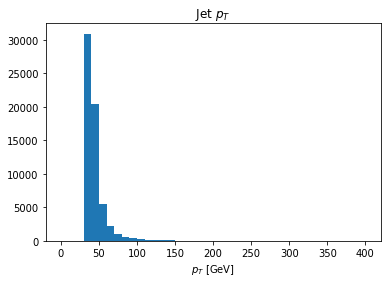

In [9]:
plt.hist(data["JetPt"]/1000.0, bins=40, range=(0.0, 400))
plt.title('Jet $p_T$')
_ = plt.xlabel('$p_T$ [GeV]')